#Importing Libraries

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import math
from sklearn.metrics import mean_squared_error

#Importing Dataset

In [76]:
df = pd.read_csv('/content/drive/MyDrive/datasets/Session/IRIS.csv')
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#Data Preprocessing

In [77]:
df = df.sample(frac=1)
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
142,5.8,2.7,5.1,1.9,Iris-virginica
24,4.8,3.4,1.9,0.2,Iris-setosa
129,7.2,3.0,5.8,1.6,Iris-virginica
126,6.2,2.8,4.8,1.8,Iris-virginica
93,5.0,2.3,3.3,1.0,Iris-versicolor


In [78]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 142 to 32
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [80]:
df1=df.copy()
df1.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
142,5.8,2.7,5.1,1.9,Iris-virginica
24,4.8,3.4,1.9,0.2,Iris-setosa
129,7.2,3.0,5.8,1.6,Iris-virginica
126,6.2,2.8,4.8,1.8,Iris-virginica
93,5.0,2.3,3.3,1.0,Iris-versicolor


In [81]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
df1['encode_species']=encode.fit_transform(df['species'])
df1.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species,encode_species
142,5.8,2.7,5.1,1.9,Iris-virginica,2
24,4.8,3.4,1.9,0.2,Iris-setosa,0
129,7.2,3.0,5.8,1.6,Iris-virginica,2
126,6.2,2.8,4.8,1.8,Iris-virginica,2
93,5.0,2.3,3.3,1.0,Iris-versicolor,1


#Splitting Independent and Dependent Variables

In [82]:
x = df1.iloc[:,:4].values
y = df1.iloc[:,-1].values
# x.head()

#Splitting the Dataset  into Train and Test Dataset

In [84]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.2, random_state = 0)

#Feature scaling

In [85]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [86]:
x_train

array([[ 7.23389125e-02,  3.53197998e-01,  5.75260921e-01,
         7.45242100e-01],
       [-5.16706518e-02, -8.86093223e-01,  1.74249159e-01,
        -2.93121348e-01],
       [ 6.92386734e-01,  3.53197998e-01,  8.61697894e-01,
         1.39421925e+00],
       [ 6.92386734e-01, -3.90376735e-01,  2.88823948e-01,
         9.62649447e-02],
       [ 1.31243456e+00,  1.05339754e-01,  9.18985289e-01,
         1.13462839e+00],
       [ 3.20358041e-01, -1.13395147e+00,  1.03356008e+00,
         2.26060376e-01],
       [-9.19737602e-01,  1.84034746e+00, -1.08607352e+00,
        -1.07189393e+00],
       [ 4.44367605e-01,  8.48914486e-01,  9.18985289e-01,
         1.39421925e+00],
       [-1.78780455e+00,  3.53197998e-01, -1.42979789e+00,
        -1.33148480e+00],
       [ 5.68377170e-01,  6.01056242e-01,  5.17973526e-01,
         4.85651238e-01],
       [-5.47708909e-01,  8.48914486e-01, -1.31522310e+00,
        -1.07189393e+00],
       [ 1.68446325e+00, -1.42518490e-01,  1.14813487e+00,
      

#KNN Classification
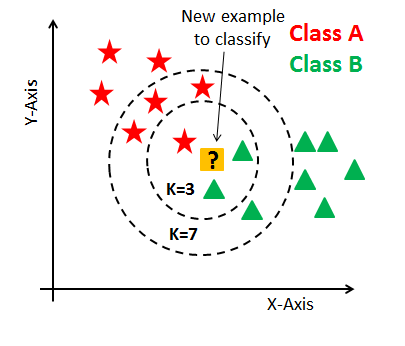

In [87]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [88]:
predict_value = knn.predict(sc.transform([[4.5,3,2,1]]))
if(predict_value == 0):
  print("Iris-setosa")
elif(predict_value == 1):
  print("Iris-versicolor")
else:
  print("Iris-virginica	")

Iris-setosa


In [89]:
y_pred = knn.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [1 2]
 [0 0]
 [2 2]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]]


In [90]:
rmse = math.sqrt(mean_squared_error(y_test,y_pred))
print(rmse)

0.18257418583505536


In [91]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[11  0  0]
 [ 0 11  0]
 [ 0  1  7]]


0.9666666666666667

In [92]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.92      1.00      0.96        11
           2       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



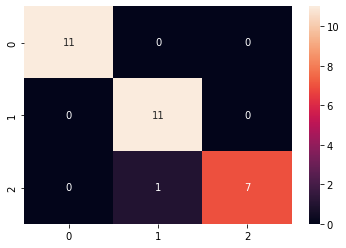

In [93]:
 sn.heatmap(confusion_matrix(y_test,y_pred),annot=True)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


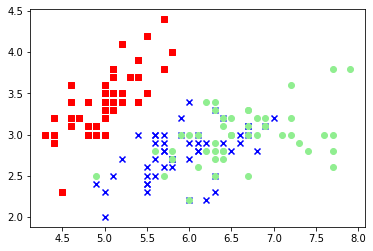

In [94]:
from matplotlib.colors import ListedColormap

markers = ('s', 'x', 'o')
colors = ('red', 'blue', 'lightgreen')
cmap = ListedColormap(colors[:len(np.unique(y_test))])
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=x[y == cl, 0], y=x[y == cl, 1],
               c=cmap(idx), marker=markers[idx], label=cl)

#Decision Trees 
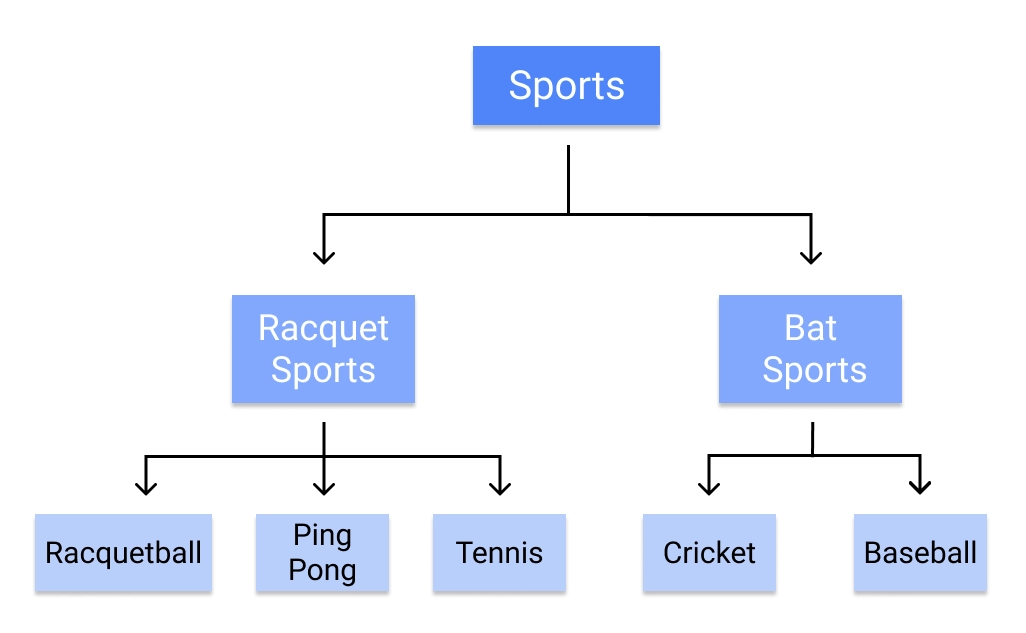

In [95]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion="entropy")
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [96]:
predict_value = dtc.predict(sc.transform([[4.5,3,2,1]]))
if(predict_value == 0):
  print("Iris-setosa")
elif(predict_value == 1):
  print("Iris-versicolor")
else:
  print("Iris-virginica	")

Iris-versicolor


In [97]:
y_pred1 = dtc.predict(x_test)
print(np.concatenate((y_pred1.reshape(len(y_pred1),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [1 2]
 [0 0]
 [2 2]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]]


In [98]:
rmse = math.sqrt(mean_squared_error(y_test,y_pred1))
print(rmse)

0.18257418583505536


In [99]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred1)
print(cm)
accuracy_score(y_test, y_pred1)

[[11  0  0]
 [ 0 11  0]
 [ 0  1  7]]


0.9666666666666667

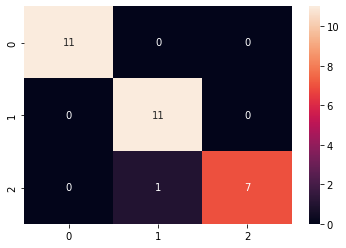

In [100]:
sn.heatmap(confusion_matrix(y_test,y_pred1),annot=True)

In [101]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.92      1.00      0.96        11
           2       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [102]:
from sklearn import tree
text_representation = tree.export_text(dtc)
print(text_representation)

|--- feature_3 <= -0.55
|   |--- class: 0
|--- feature_3 >  -0.55
|   |--- feature_3 <= 0.68
|   |   |--- feature_2 <= 0.72
|   |   |   |--- feature_3 <= 0.55
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  0.55
|   |   |   |   |--- feature_1 <= -0.76
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_1 >  -0.76
|   |   |   |   |   |--- class: 1
|   |   |--- feature_2 >  0.72
|   |   |   |--- feature_0 <= 0.26
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  0.26
|   |   |   |   |--- class: 2
|   |--- feature_3 >  0.68
|   |   |--- feature_2 <= 0.60
|   |   |   |--- feature_0 <= 0.13
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  0.13
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  0.60
|   |   |   |--- class: 2



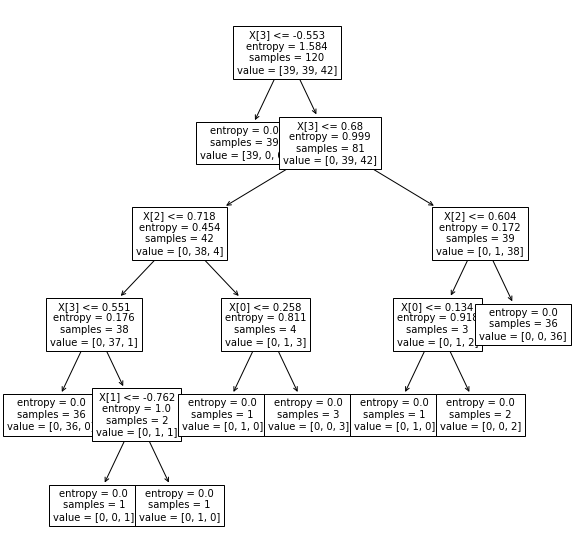

In [103]:
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(dtc, fontsize=10)
plt.show()

#Random Forest Classifier
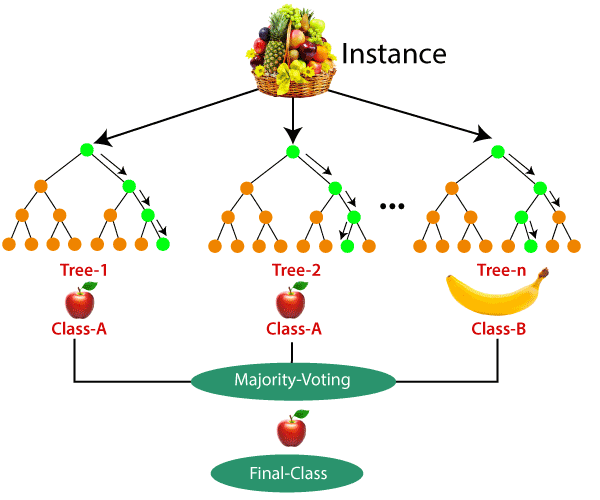

In [104]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 50)
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [105]:
predict_value = rfc.predict(sc.transform([[4.5,3,2,1]]))
if(predict_value == 0):
  print("Iris-setosa")
elif(predict_value == 1):
  print("Iris-versicolor")
else:
  print("Iris-virginica	")

Iris-setosa


In [106]:
y_pred2 = dtc.predict(x_test)
print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [1 2]
 [0 0]
 [2 2]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]]


In [107]:
rmse = math.sqrt(mean_squared_error(y_test,y_pred2))
print(rmse)

0.18257418583505536


In [108]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred2)
print(cm)
accuracy_score(y_test, y_pred2)


[[11  0  0]
 [ 0 11  0]
 [ 0  1  7]]


0.9666666666666667

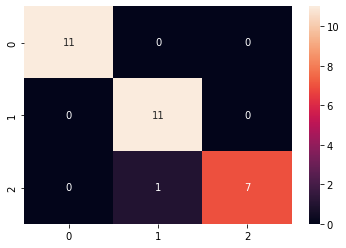

In [109]:
sn.heatmap(confusion_matrix(y_test,y_pred2),annot=True)

In [110]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.92      1.00      0.96        11
           2       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



#Naive Bayes Classifier
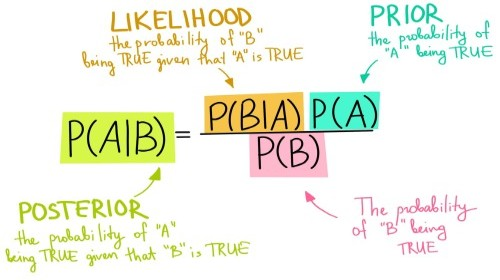

In [111]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [112]:
predict_value = gnb.predict(sc.transform([[4.5,3,2,1]]))
if(predict_value == 0):
  print("Iris-setosa")
elif(predict_value == 1):
  print("Iris-versicolor")
else:
  print("Iris-virginica	")

Iris-versicolor


In [113]:
y_pred3= gnb.predict(x_test)
print(np.concatenate((y_pred3.reshape(len(y_pred3),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [1 2]
 [0 0]
 [2 2]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]]


In [114]:
rmse = math.sqrt(mean_squared_error(y_test,y_pred3))
print(rmse)

0.18257418583505536


In [115]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred3)
print(cm)
accuracy_score(y_test, y_pred3)

[[11  0  0]
 [ 0 11  0]
 [ 0  1  7]]


0.9666666666666667

In [116]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.92      1.00      0.96        11
           2       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



#SVM
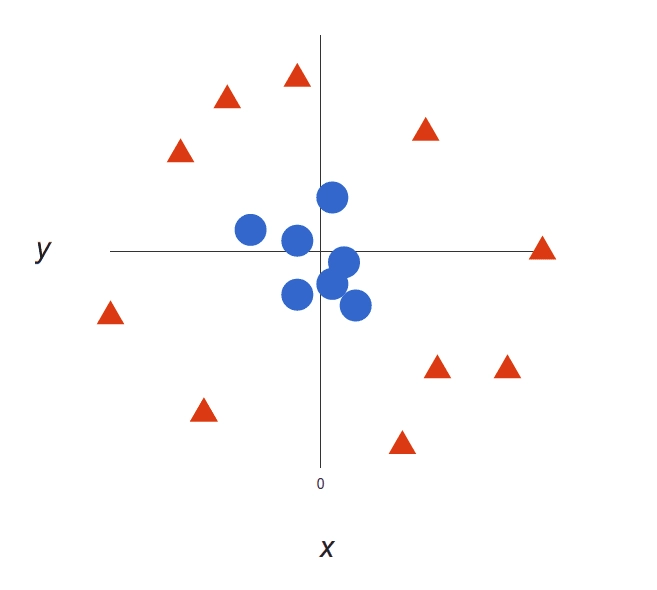
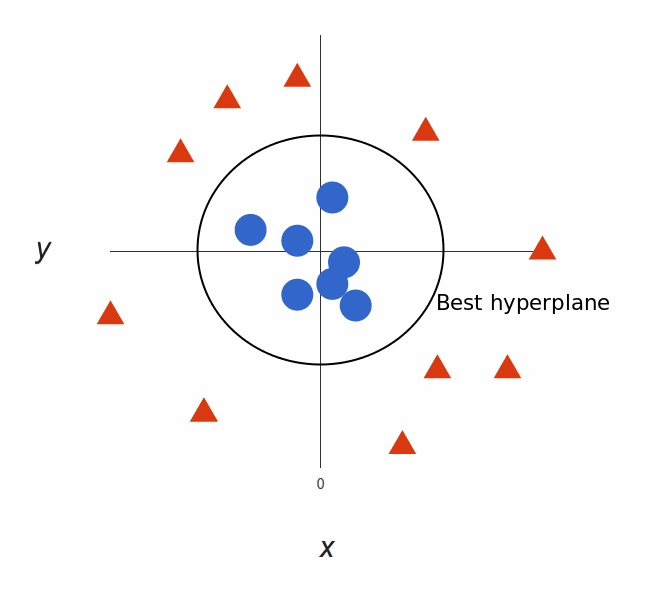

In [117]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)

SVC()

In [118]:
predict_value = svc.predict(sc.transform([[4.5,3,2,1]]))
if(predict_value == 0):
  print("Iris-setosa")
elif(predict_value == 1):
  print("Iris-versicolor")
else:
  print("Iris-virginica	")

Iris-setosa


In [119]:
y_pred4 = svc.predict(x_test)
print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [1 2]
 [0 0]
 [2 2]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]]


In [120]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred4)
print(cm)
accuracy_score(y_test, y_pred4)

[[11  0  0]
 [ 0 11  0]
 [ 0  1  7]]


0.9666666666666667

In [121]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.92      1.00      0.96        11
           2       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [122]:
rmse = math.sqrt(mean_squared_error(y_test,y_pred4))
print(rmse)

0.18257418583505536
